# Wine Quality Research

## Project Description
The goal of the project is to analyze the data, find driving features of wine quality, predict quality of wine, and recommend actions to produce good quality of wine.

## Goals:

   - Discover drivers of wine quality
   - Use drivers to develop a model to wine quality
   - Offer recommendation to  produce good quality wine

In [1]:
# Essential Imports
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy import stats

# Import .py files
import prepare as pr
import explore as ex
import model as mo

# Sklearn imports
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import warnings
warnings.filterwarnings('ignore')
seed = 42


## Acquire

- Acquired data from Data.World Wine Quality Dataset using acquire.py file.
- It contained 6497 rows and 13columns.
- Each row represents a wine.
- Each column represents a feaures of a wine.

In [2]:
# acquire data
wine= pr.wine_data()

# peak into data
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Prepare

#### Prepare Actions:
- Rename columns names
- Checked for Nulls, no Null
- Encoded categorical varibales
- split data into train, validate and test (approx. 56/24/20)

In [3]:
# create train, validate, test data
train,validate,test = pr.train_val_test(wine,'quality')
train.shape,validate.shape,test.shape

((3637, 14), (1560, 14), (1300, 14))

In [4]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_bin,type_white
542,9.3,0.715,0.24,2.1,0.070,5.0,20.0,0.99660,3.12,0.59,9.9,5,average,0
1484,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9,4,average,0
2641,6.1,0.150,0.35,15.8,0.042,55.0,158.0,0.99642,3.24,0.37,10.6,5,average,1
2005,7.0,0.280,0.33,14.6,0.043,47.0,168.0,0.99940,3.34,0.67,8.8,6,average,1
3121,7.6,0.230,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,average,1


In [5]:
# create scaled train, sacled validate, scaled test data
trains,validates,tests = pr.split_data(wine.drop(columns='quality_bin'),'quality')
trains.shape,validates.shape,tests.shape

((3637, 13), (1560, 13), (1300, 13))

In [6]:
trains.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_white
542,9.3,0.715,0.24,2.1,0.070,5.0,20.0,0.99660,3.12,0.59,9.9,5,0
1484,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9,4,0
2641,6.1,0.150,0.35,15.8,0.042,55.0,158.0,0.99642,3.24,0.37,10.6,5,1
2005,7.0,0.280,0.33,14.6,0.043,47.0,168.0,0.99940,3.34,0.67,8.8,6,1
3121,7.6,0.230,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,1


## Explore

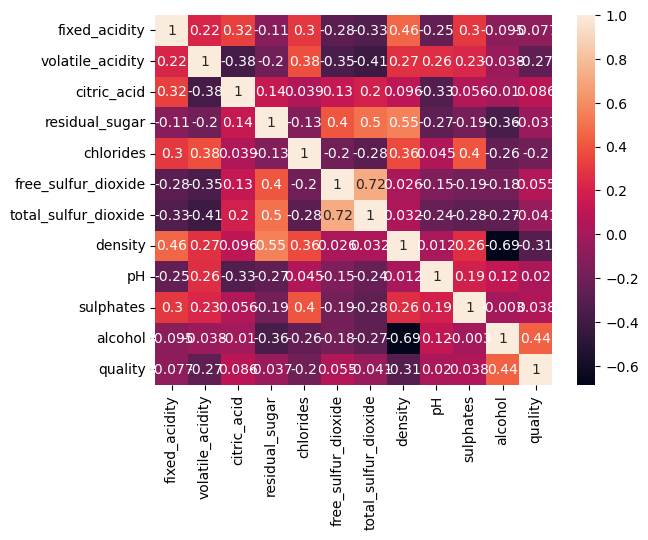

In [7]:
# get heatmap
mo.get_heatmap(wine)

In [8]:
ex.get_correlation(wine)

quality                 1.000000
alcohol                 0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64 



# What is the relationship between alcohol and quality?

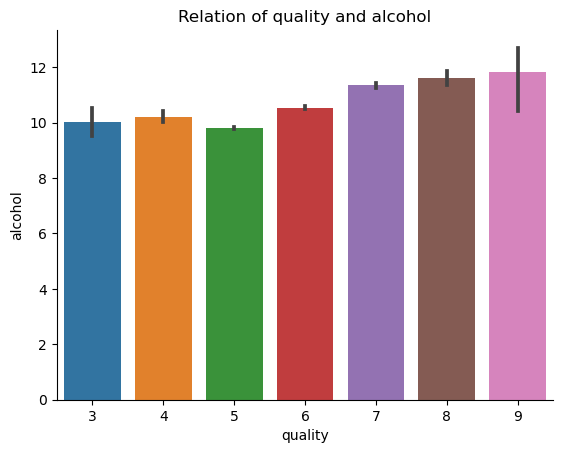

In [9]:
# get graph 
ex.viz_barplot(train, 'quality', 'alcohol')

In [10]:
# get result from pearsonr test
ex.pearson_test(train,'alcohol','quality')

p is 0.0000000000, 0.4419210227831018
The pearson r test shows that there is a signficant relationship.


<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that quality of wine increaes when alcohol percentage is more than 11.
    
Pearsonr test shows that alchol and quality has positive correlation of .44 and has a significant relationship. 
</div>


## Does density play role in determining quality of wine?

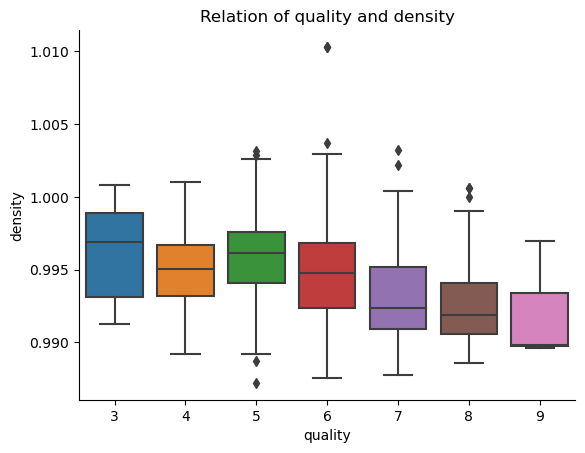

In [11]:
# get graph
ex.viz_boxplot(train, 'quality','density')

In [12]:
# get result from pearsonr test
ex.pearson_test(train,'density','quality')

p is 0.0000000000, -0.31002127979856076
The pearson r test shows that there is a signficant relationship.


<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that density below .995 is optimal to make good wine. Density has negative correaltion with quality of wine. 
    
Pearsonr test shows that alchol and quality has negative correlation of about 0.31 and has a significant relationship. 

</div>

# Is the relationship between volatile_acidity and quality significant?

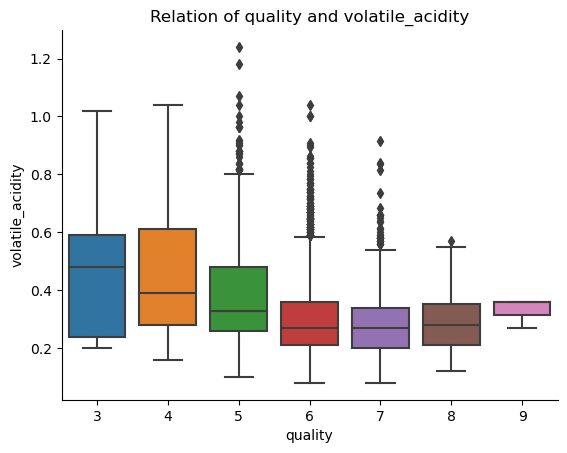

In [13]:
ex.viz_boxplot(train, 'quality', 'volatile_acidity')

<div class="alert alert-block alert-info">
<b>$Ha$:</b> There is no significant difference in the mean  
    
    
<b>$Ho$:</b> There is a significant difference in the mean  
</div>

In [14]:
# get result from pearsonr test
ex.pearson_test(train,'volatile_acidity','quality')

p is 0.0000000000, -0.2587959872859457
The pearson r test shows that there is a signficant relationship.


In [15]:
mo.vol_t_test(train)

p = 2.0796791836066002e-26, t = -10.746362824466681
Reject $H_{0}$?  True


<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that volatile acidity has negative correlation with quality of alcohol. Wine with volatile acidity above .4 is poor in quality.  
</div>

#### What role does chlorides and density play on quality of wine?

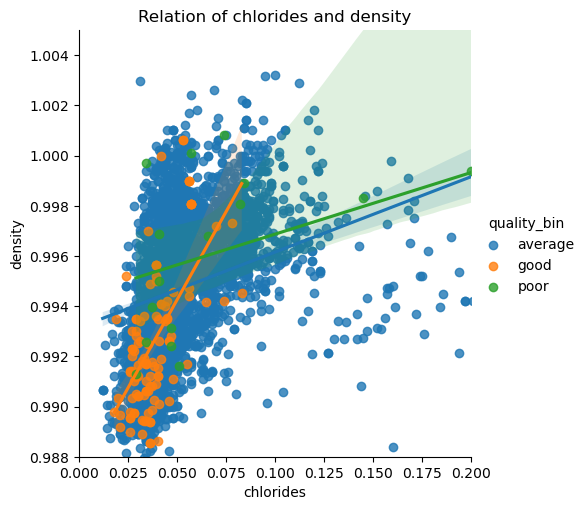

In [16]:
ex.viz_lmplot(train, 'chlorides', 'density')

<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that low density and low chlorides produce good wine. 
    
 
</div>

### Split Data for scaling

In [17]:
# splitting the features from the target
x_train, y_train, x_validate, y_validate, x_test, y_test = pr.x_and_y(trains,validate,tests,'quality')

In [18]:
# splitting the features from the target on our scaled data
x_trains, y_train, x_validates, y_validate, x_tests, y_test = pr.x_and_y(trains,validates,tests,'quality')

In [19]:
x_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type_white
542,9.3,0.715,0.24,2.1,0.070,5.0,20.0,0.99660,3.12,0.59,9.9,0
1484,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9,0
2641,6.1,0.150,0.35,15.8,0.042,55.0,158.0,0.99642,3.24,0.37,10.6,1
2005,7.0,0.280,0.33,14.6,0.043,47.0,168.0,0.99940,3.34,0.67,8.8,1
3121,7.6,0.230,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,1


In [20]:
x_trains.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type_white
542,9.3,0.715,0.24,2.1,0.070,5.0,20.0,0.99660,3.12,0.59,9.9,0
1484,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9,0
2641,6.1,0.150,0.35,15.8,0.042,55.0,158.0,0.99642,3.24,0.37,10.6,1
2005,7.0,0.280,0.33,14.6,0.043,47.0,168.0,0.99940,3.34,0.67,8.8,1
3121,7.6,0.230,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,1


## `alcohol` and `density`

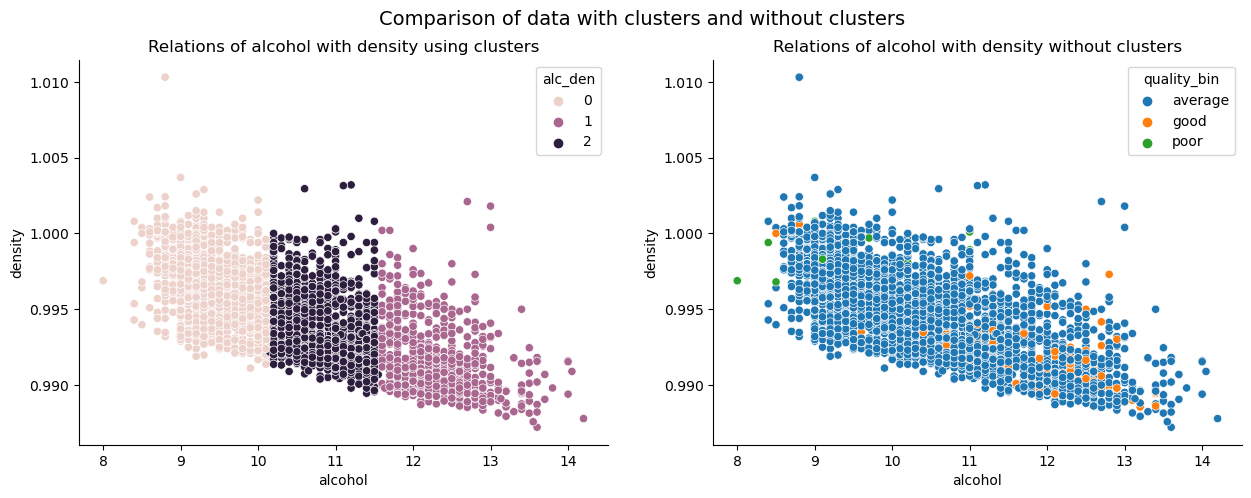

In [21]:
x_trains,x_validates,x_tests = mo.alc_den_clusters(x_trains,x_validates,x_tests,train)

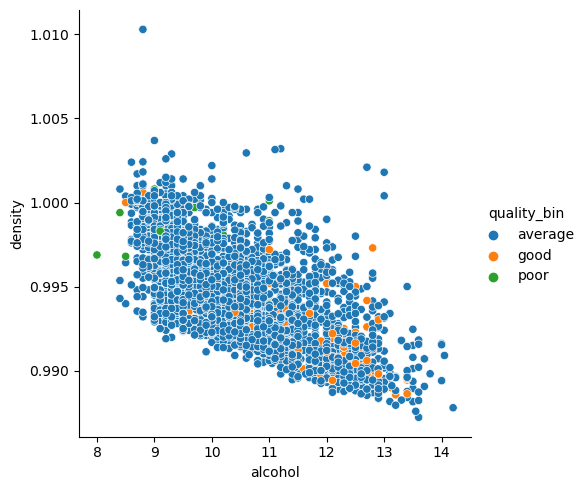

In [22]:
sns.relplot(data=train, x='alcohol', y='density', hue='quality_bin')

In [23]:
# creating num cols
num_cols = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar', 'chlorides', 'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']

## `alochol` and `volatile_acidty`

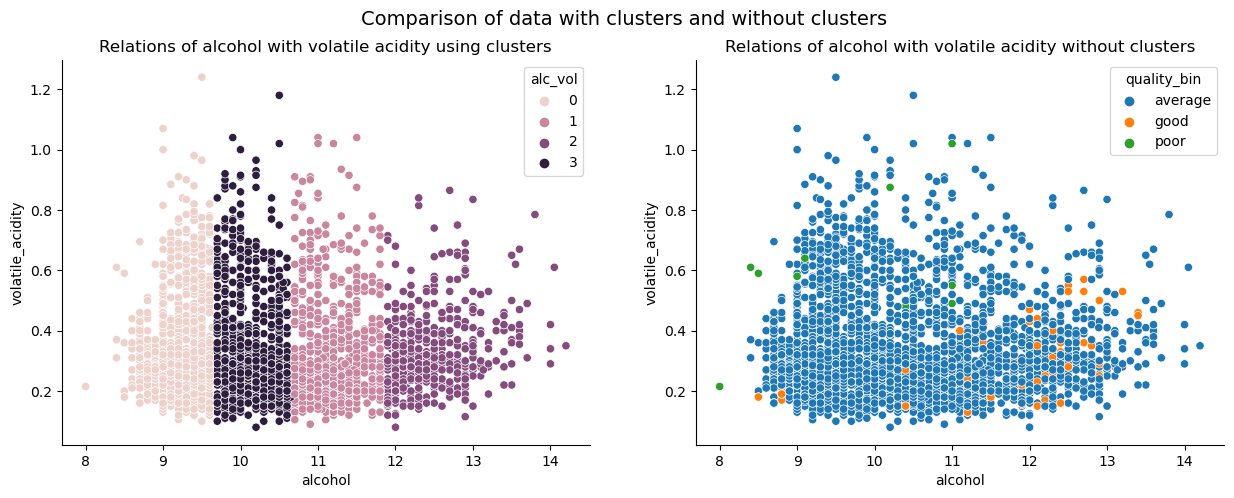

In [24]:
x_trains,x_validates,x_tests = mo.alc_vol_clusters(x_trains,x_validates,x_tests,train)

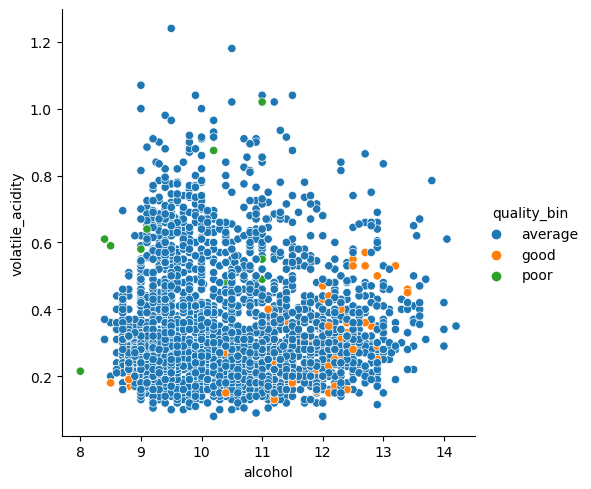

In [25]:
sns.relplot(data=train, x='alcohol', y='volatile_acidity', hue='quality_bin')

low volatile acidity with high alcohol produces good wine.


##  `residual_sugar` and `density`

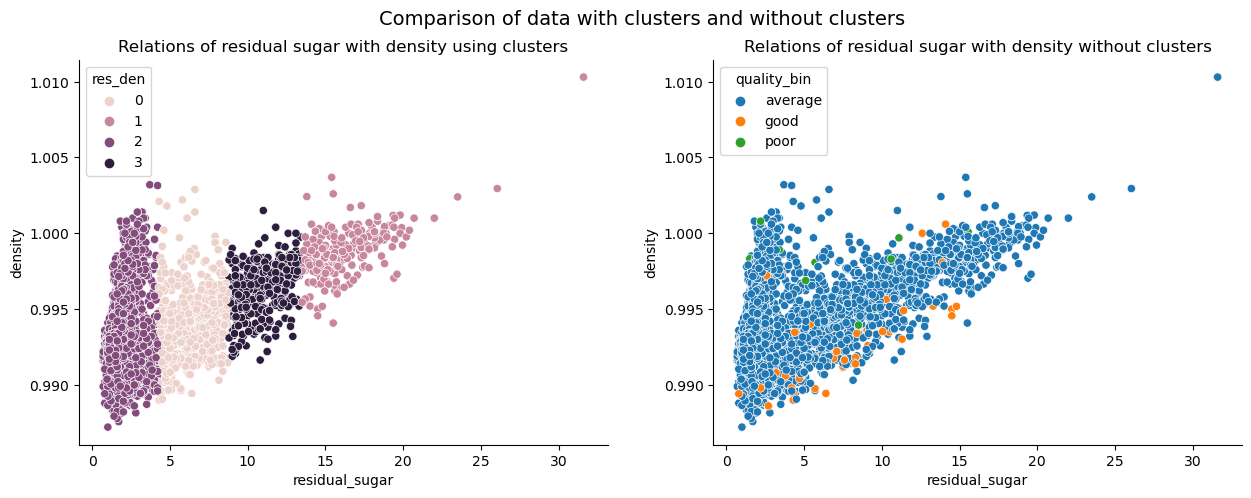

In [26]:
x_trains,x_validates,x_tests = mo.den_res_clusters(x_trains,x_validates,x_tests,train)

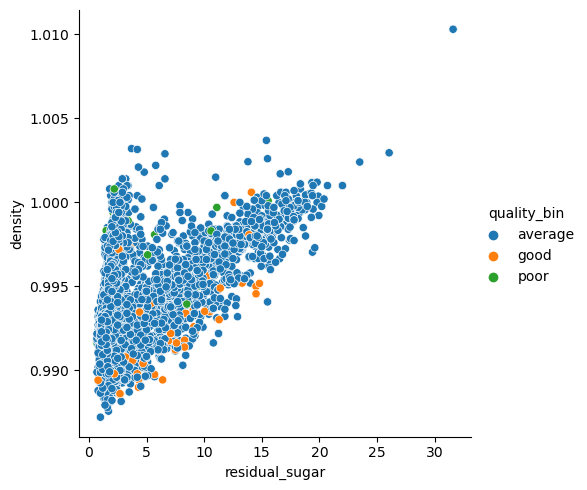

In [27]:
sns.relplot(data=train, x='residual_sugar', y='density', hue='quality_bin')

(0.0, 0.11)

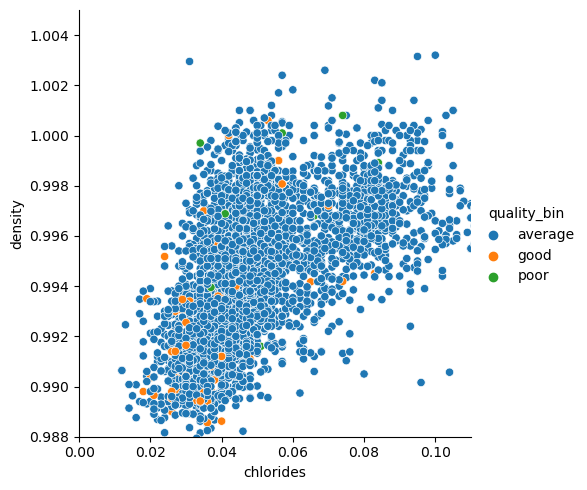

In [28]:
sns.relplot(data=train, x='chlorides', y='density', hue='quality_bin')
plt.ylim(.988, 1.005)
plt.xlim(0.0, .11)

(0.0, 0.2)

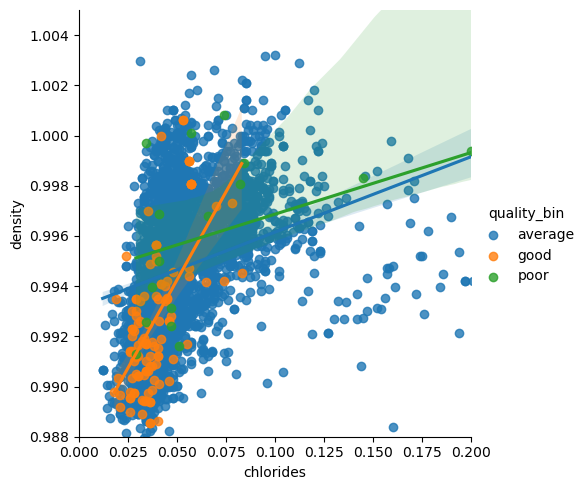

In [29]:
sns.lmplot(data=train, x='chlorides', y='density', hue='quality_bin')
plt.ylim(.988, 1.005)
plt.xlim(0.0, .2)

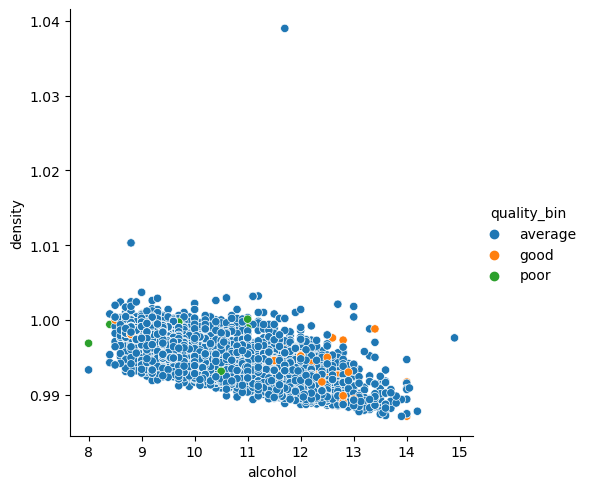

In [30]:
sns.relplot(x='alcohol', y='density',data=wine, hue='quality_bin')

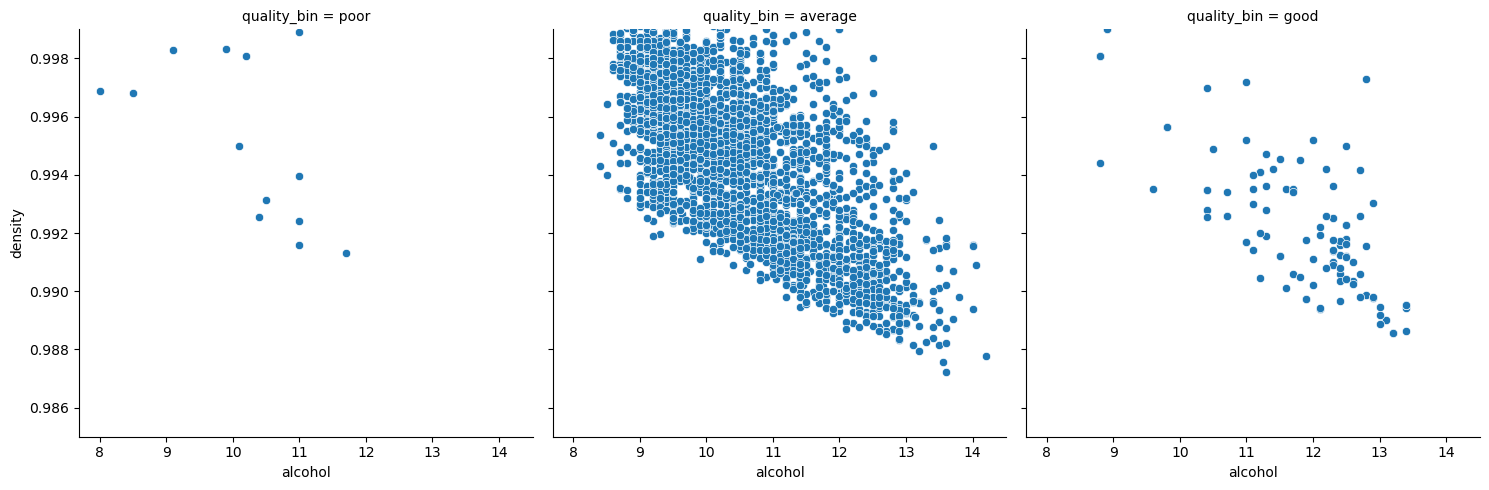

In [31]:
sns.relplot(x='alcohol', y='density',data=train, kind='scatter',col='quality_bin', col_order=['poor','average','good'])
plt.ylim(.985,.999)
plt.show()

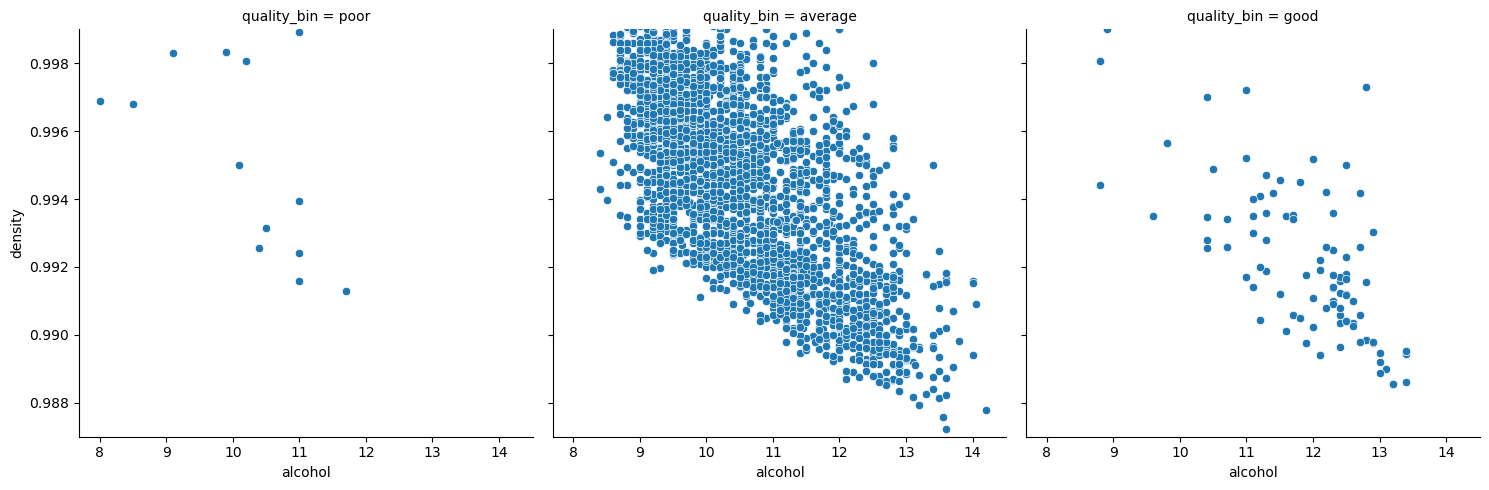

In [32]:
sns.relplot(x='alcohol', y='density',data=train, kind='scatter',col='quality_bin', col_order=['poor','average','good'])
plt.ylim(.987,.999)
plt.show()

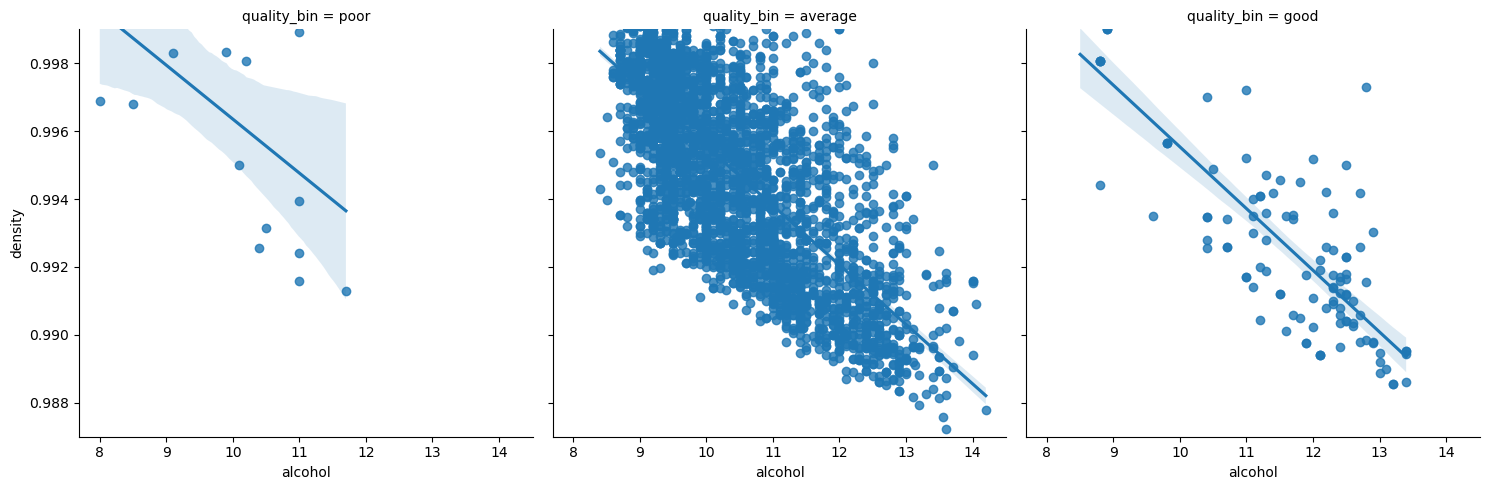

In [33]:
sns.lmplot(x='alcohol', y='density',data=train,col='quality_bin', col_order=['poor','average','good'])
plt.ylim(.987,.999)
plt.show()

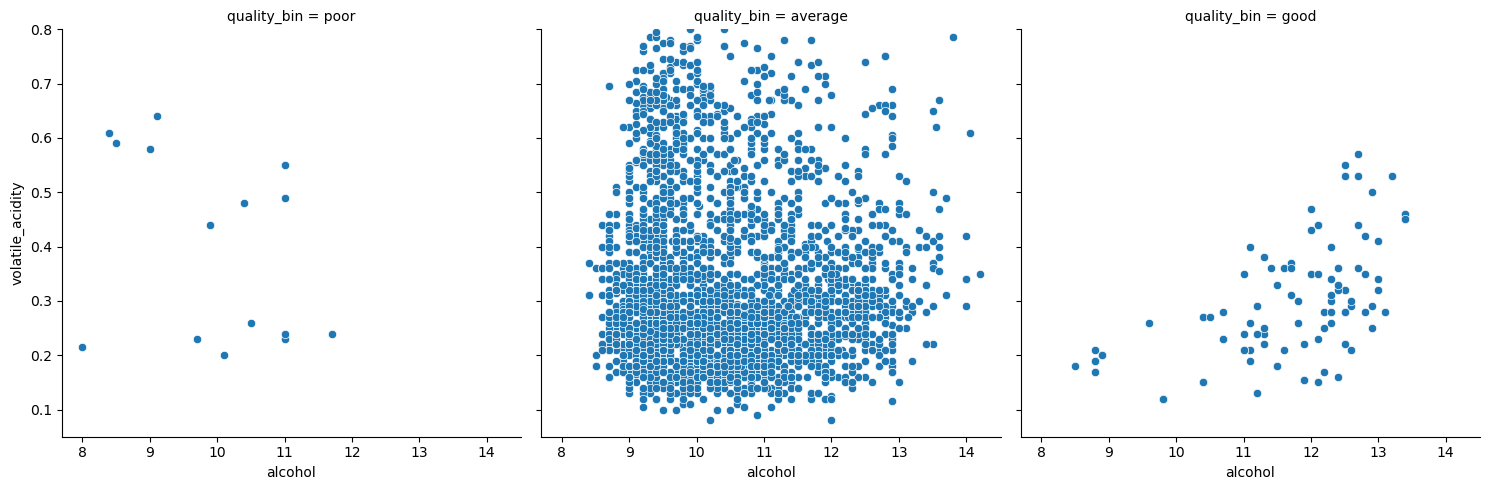

In [34]:
sns.relplot(x='alcohol', y='volatile_acidity',data=train, kind='scatter',col='quality_bin', col_order=['poor','average','good'])
plt.ylim(.05,.8)
plt.show()

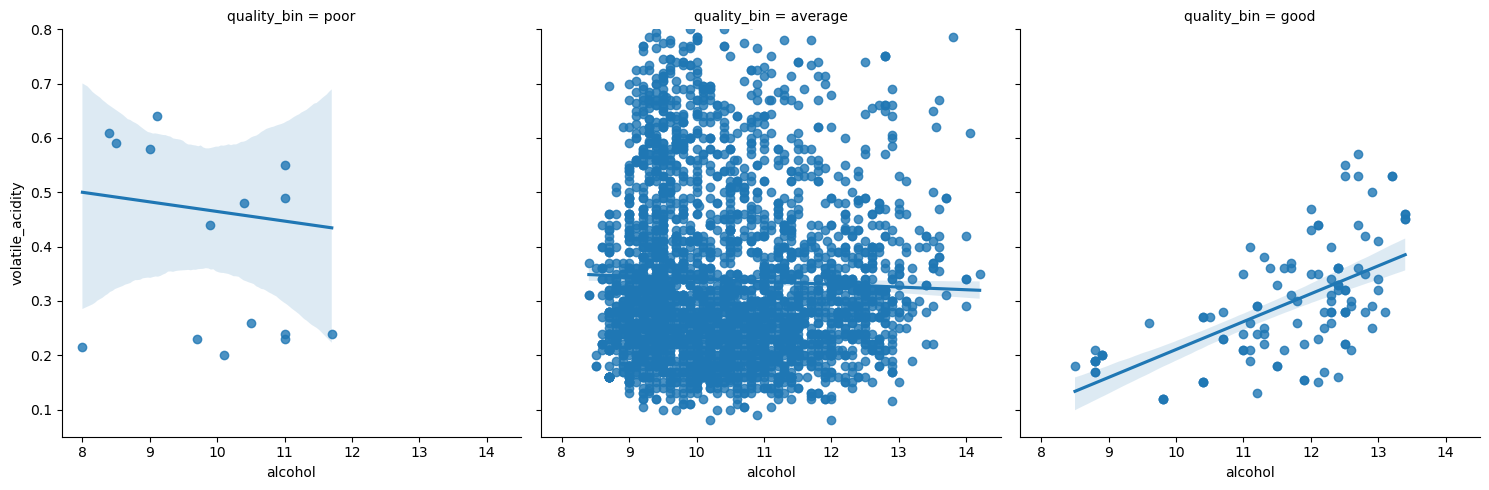

In [35]:
sns.lmplot(x='alcohol', y='volatile_acidity',data=train,col='quality_bin', col_order=['poor','average','good'])
plt.ylim(.05,.8)
plt.show()

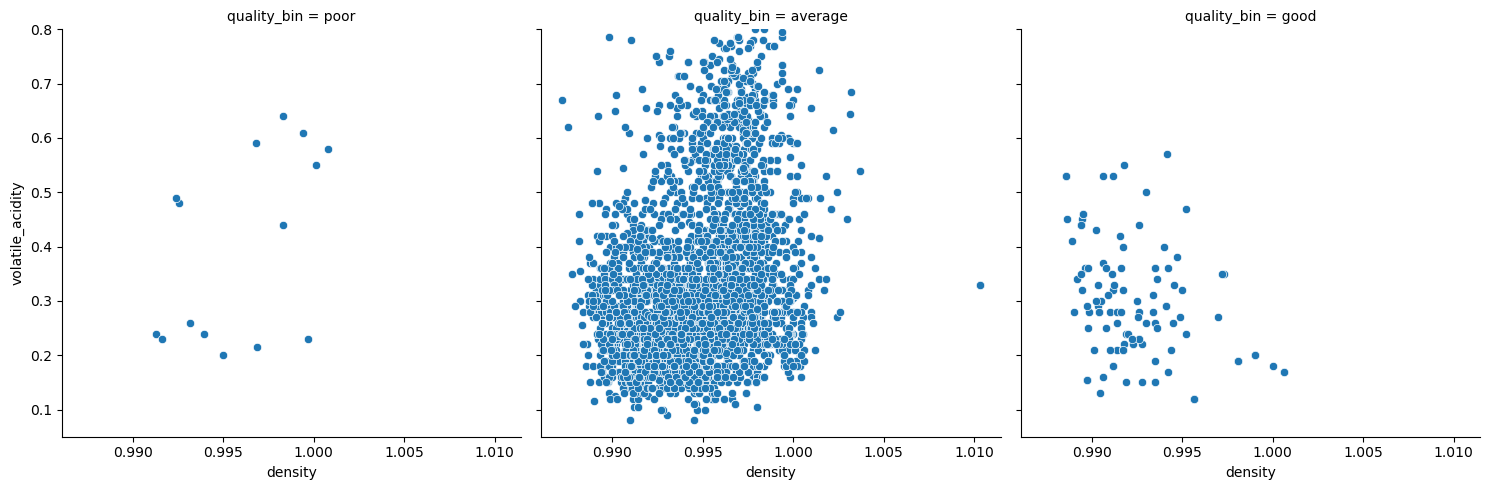

In [36]:
sns.relplot(x='density', y='volatile_acidity',data=train, kind='scatter',col='quality_bin', col_order=['poor','average','good'])
plt.ylim(.05,.8)
plt.show()

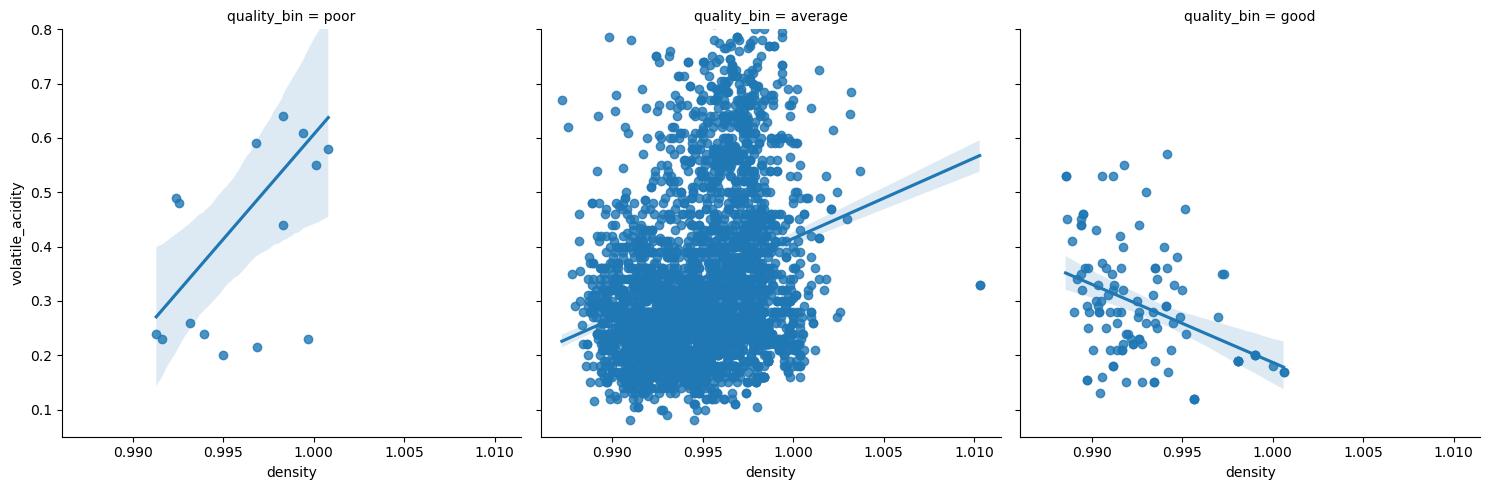

In [37]:
sns.lmplot(x='density', y='volatile_acidity',data=train,col='quality_bin', col_order=['poor','average','good'])
plt.ylim(.05,.8)
plt.show()

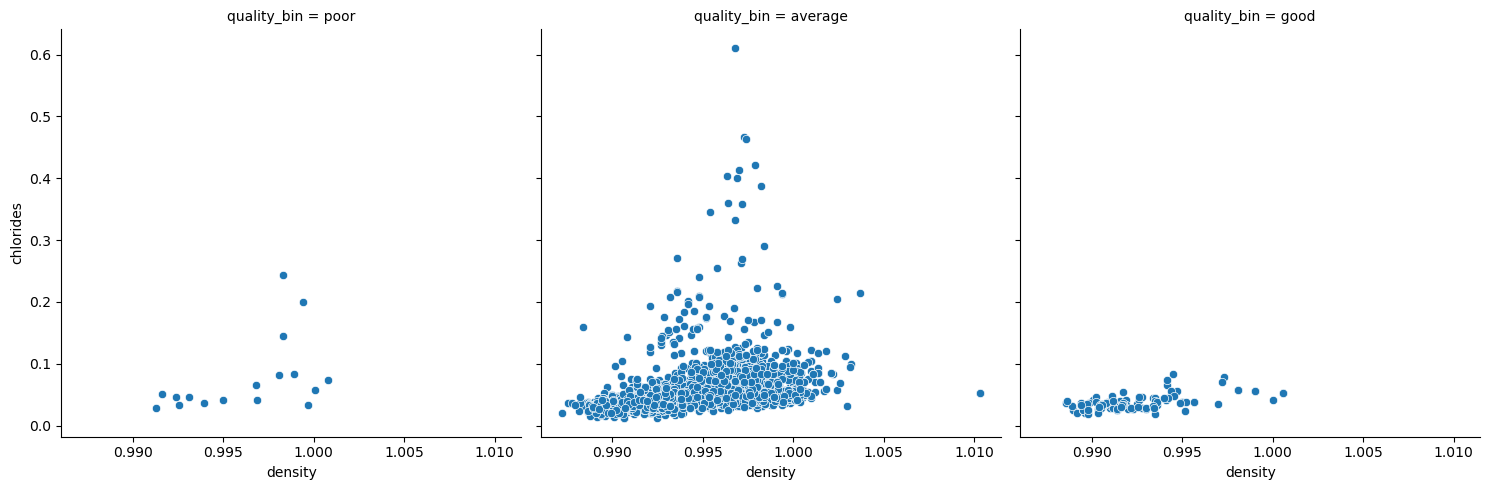

In [38]:
sns.relplot(x='density', y='chlorides',data=train, col='quality_bin', col_order=['poor','average','good'])
plt.show()

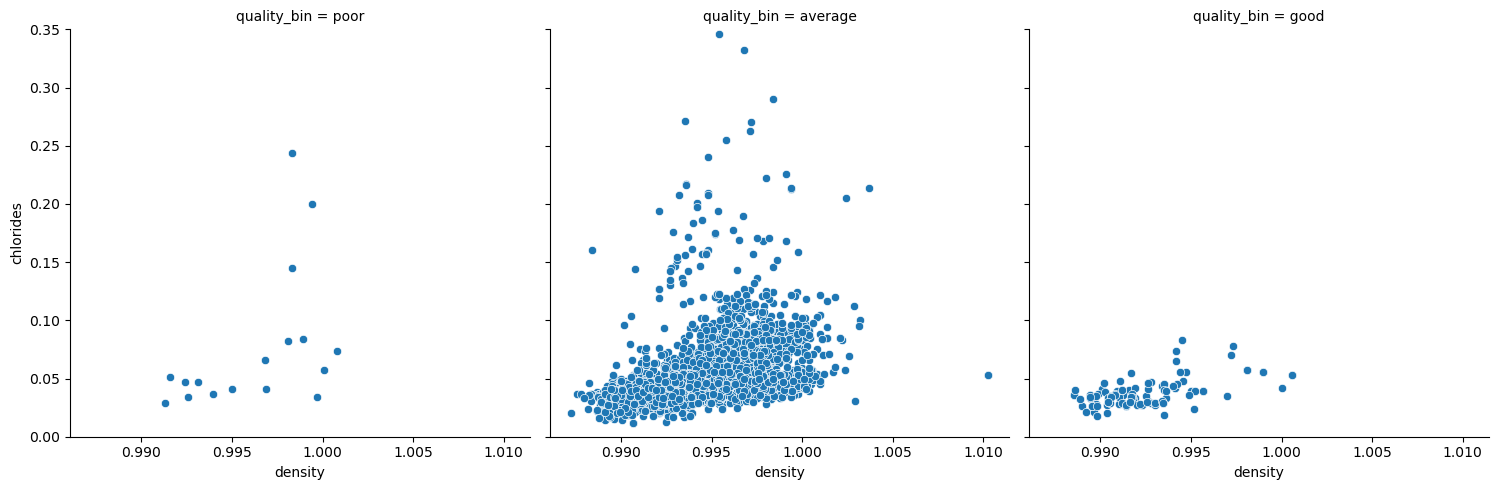

In [39]:
sns.relplot(x='density', y='chlorides',data=train,col='quality_bin', col_order=['poor','average','good'])
plt.ylim(.0,.35)
plt.show()

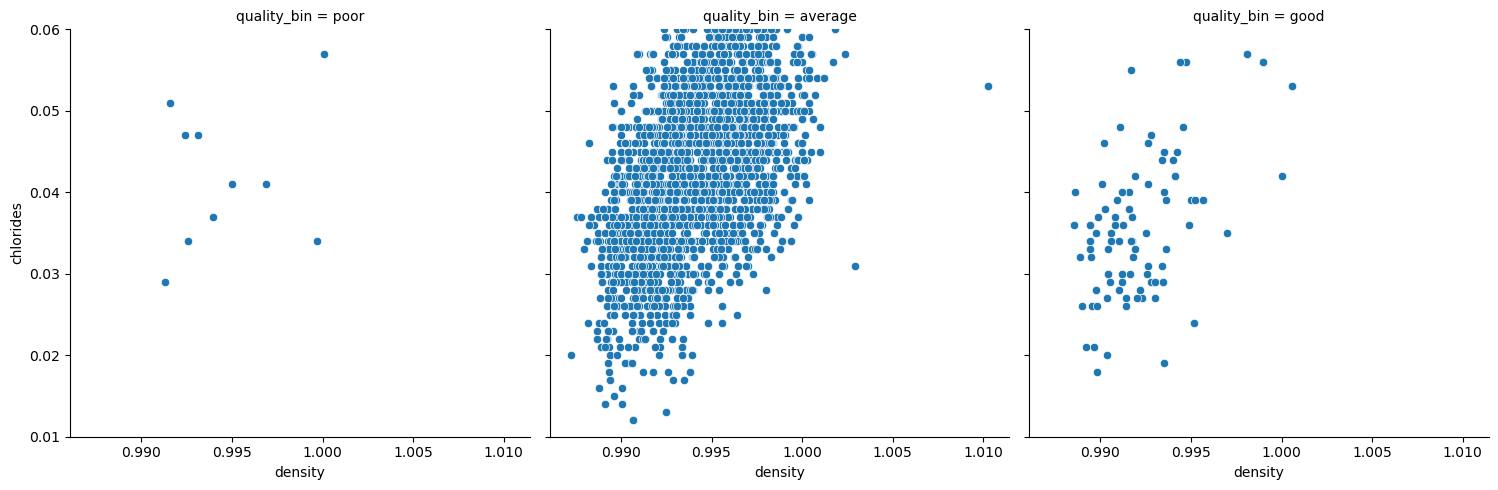

In [40]:
sns.relplot(x='density', y='chlorides',data=train,col='quality_bin', col_order=['poor','average','good'])
plt.ylim(.01,.06)
plt.show()

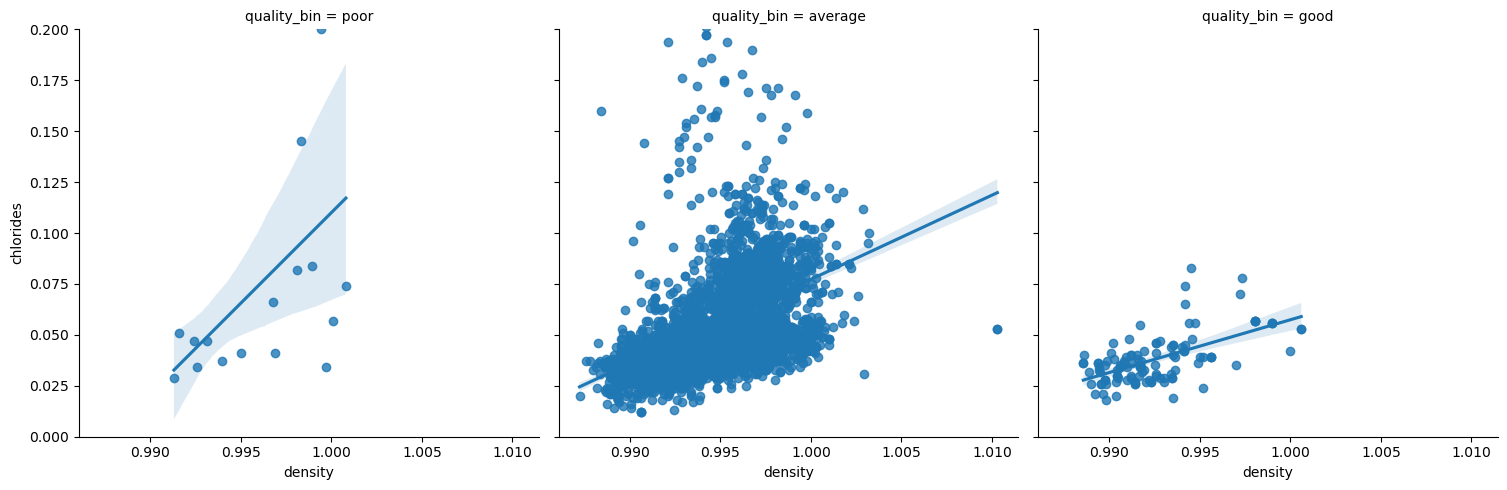

In [41]:
sns.lmplot(x='density', y='chlorides',data=train,col='quality_bin', col_order=['poor','average','good'])
plt.ylim(.0,.2)
plt.show()

### Exploration Summary:
- Alcohol, chlorides, volatile acidity and density has high correlation with quality
- Alochol has positive correlation with quality, but chlorides, volatile acidity and density have negative correlation with quality
- 


### Baseline Accuracy

In [42]:
# get baseline accuracy
mo.get_baseline_accuracy(x_train, y_train)

Baseline accuracy: 0.43662359087159747


<div class="alert alert-block alert-warning">
<b>Baseline Accuracy:</b> 44%

## Modeling
-  I will use train data and validate data on different models to get the model that performs the best.Then, I will use the test data on the best model to get predicitons.
- I will use my baseline accuracy as my evaluation metric.
- I will use following four modelsto get the best model:
    - Model 1: Decision Tree
    - Model 2: Random forest Tree 
    - Model 3: KNN


<div class="alert alert-block alert-info">
<b>Modeling</b>   
    
## Modeling


In [43]:
df1 = mo.decision_tree(x_trains, x_validates, y_train, y_validate)
# df1

In [44]:
# list the validate accuracy on descending order
df1.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(20)

,max_depth,train_accuracy,validate_accuracy,difference
7,8,0.676382,0.555769,0.120612
8,9,0.718449,0.551923,0.166526
6,7,0.643662,0.546795,0.096867
5,6,0.611768,0.526923,0.084845
3,4,0.558427,0.525641,0.032786
1,2,0.529832,0.520513,0.009319
4,5,0.580973,0.519872,0.061102
0,1,0.496288,0.501923,-0.005635
2,3,0.539181,0.498718,0.040463


selected Max_Depth = 7

In [45]:
tree_train_acc, tree_train_validate_acc= mo.get_decision_tree(x_trains, x_validates, y_train, y_validate,7)
tree_train_acc, tree_train_validate_acc

(0.6436623590871597, 0.5467948717948717)

In [46]:
df2 = mo.random_forest_tree(x_trains, x_validates, y_train, y_validate)
# df2

In [47]:
# list the validate accuracy on descending order
df2.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(20)

,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,1,1.000000,0.645513,0.354487
1,2,0.976079,0.637179,0.338900
2,3,0.910366,0.624359,0.286007
3,4,0.862799,0.618590,0.244209
4,5,0.824306,0.607051,0.217254
5,6,0.794061,0.600641,0.193420
6,7,0.770690,0.595513,0.175177
7,8,0.746769,0.585897,0.160872
9,10,0.722024,0.582051,0.139972
8,9,0.734122,0.578205,0.155916


selected min_samples = 19

In [48]:
random_train_acc, random_validate_acc= mo.get_random_forest(x_trains, x_validates, y_train, y_validate, 19)
random_train_acc, random_validate_acc

(0.652735771240033, 0.5551282051282052)

In [49]:
df3 = mo.knn(x_trains, x_validates, y_train, y_validate)
# df3

In [50]:
# list the validate accuracy on descending order
df3.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(10)

,n_neighbors,train_accuracy,validate_accuracy,difference
0,1,1.000000,0.533974,0.466026
1,2,0.778664,0.490385,0.288279
2,3,0.728897,0.485256,0.243641
6,7,0.609568,0.480128,0.129440
15,16,0.544680,0.479487,0.065193
19,20,0.525158,0.475641,0.049517
20,21,0.524333,0.473718,0.050615
18,19,0.531207,0.473718,0.057489
23,24,0.514710,0.472436,0.042274
14,15,0.542480,0.471795,0.070685


neighbor = 13

In [51]:
knn_train_acc, knn_validate_acc= mo.get_knn(x_trains, x_validates, y_train, y_validate, 13)
knn_train_acc, knn_validate_acc

(0.5485290074237008, 0.46474358974358976)

In [52]:
df4= mo.logistic_regression(x_trains, x_validates, y_train, y_validate)
df4

,model,train_accuracy,validate_accuracy,difference
0,"LogisticRegression(C=1, random_state=42, solve...",0.538631,0.539103,-0.000472
1,"LogisticRegression(C=0.1, random_state=42, sol...",0.528732,0.532692,-0.003960


In [53]:
logistic_train_acc, logistic_validate_acc = mo.get_logistic_regrssion(x_trains, x_validates, y_train, y_validate, 1)
logistic_train_acc, logistic_validate_acc

(0.5386307396205664, 0.5391025641025641)

In [54]:
df = mo.get_models_accuracy(x_trains, y_train, x_validates, y_validate, trains, validates)
df

,train_accuracy,validate_accuracy,difference
Decision_Tree(max_depth=7),0.643662,0.546795,0.096867
Random_Forest(min_samples_lead=19),0.652736,0.555128,0.097608
KNN (Neighours=13),0.548529,0.464744,0.083785
Logistic_Regression(C=1),0.538631,0.539103,-0.000472


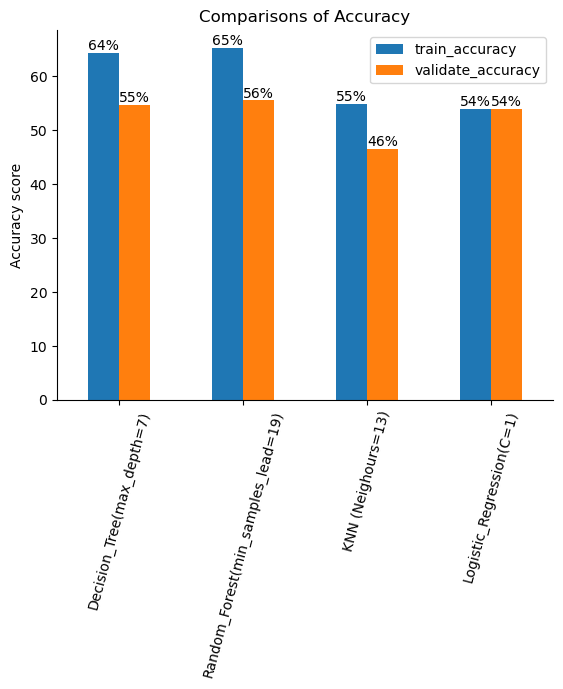

In [55]:
mo.viz_models_accuracy(df)

### Model Evaluation

In [56]:
mo.get_random_forest_test(x_train, x_test, y_train, y_test,19)

0.5823076923076923


In [57]:
mo.get_random_forest_test(x_trains, x_tests, y_train, y_test,19)

0.5769230769230769


<div class="alert alert-block alert-warning">
<b>Baseline Accuracy:</b> 44%

<div class="alert alert-block alert-warning">
<b>Random Forest With a Max Depth 19 Accuracy score on test data:</b> 58%

<div class="alert alert-block alert-success">
<b>Modelling summary:</b> 
    
- All models perfomed better than baseline on train and validat data.
    
- Random forest tree model has the highest accuracy score of about 56% on validate data. 
    
- Random forest tree model has the accuracy score of about 58% on test data and beat the baseline accuracy by about 14%.
    
</div>

## Conclusions 


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
    
- Alcohol, chlorides, volatile acidity and density has high correlation with quality
    
- Alochol has positive correlation with quality, but chlorides, volatile acidity and density have negative correlation with quality
    
- All models perfomed better than baseline on train and validat data.
      
- Random forest tree model has the accuracy score of about 58% on test data and beat the baseline accuracy by about 14%.
    
* We feel comfortable saying Random forest tree is fit for production, until we are able to out perform it with a different model.


### Recommendations


<div class="alert alert-block alert-success">
<b>Recommendation:</b>
    
* We recommend to target wines the have an above average alcohol content(around 10.5 +), as well as, keeping `density` and `volatile_acidity` low
</div>

<div class="alert alert-block alert-success">
<b>Next Steps:</b>
    
*  We have a model to beat baseline but we would like to do more feature exploration
</div>